## Exercise 3.1 - Analysis and Visualisation of Complex Agro-Environmental Data

In this exercise you will use the dataset in EFIplus_medit.zip to:
• Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250, 
300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate 
visualization to show how many samples will we need to have a good estimate of the population mean 
(this is a corrected version of the last challenge of the previous exercise).
• Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the 
presence of Salmo trutta fario (Brown Trout).
• Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a 
normal distribution.
• Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot 
the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution.


In [8]:
import random
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [9]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

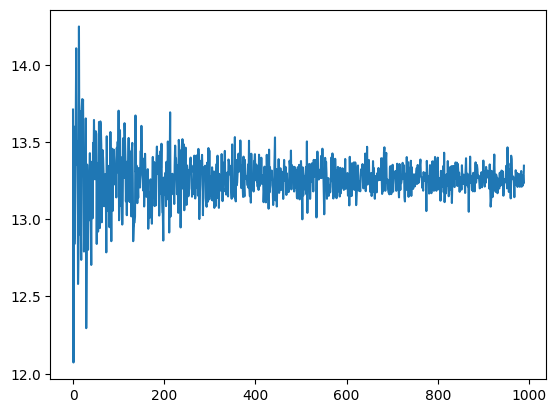

In [14]:
mean = []
for i in range(10,1000,1):
    sample = pd.Series(random.sample(list(df['temp_ann']), i))
    mean.append(sample.mean())
sns.lineplot(mean)
plt.show()

In [15]:
ctab = pd.crosstab(df['temp_ann'], df['Salmo trutta fario'])
#print(ctab)

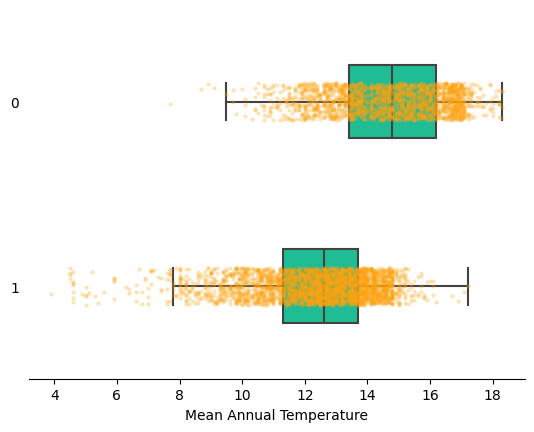

In [16]:
sns.boxplot(
    data= df,
    x='temp_ann',
    y='Salmo trutta fario',
    orient='h',
    width=0.4,
    fliersize=0,
    color='#06d6a0', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.stripplot(
    data= df,
    x='temp_ann',
    y='Salmo trutta fario',
    orient='h',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#fca311', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')
plt.show()

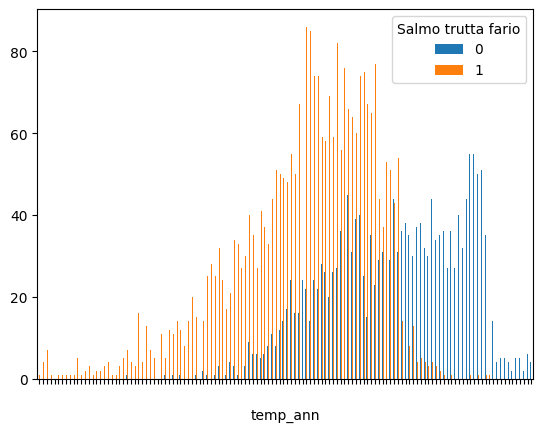

In [18]:
barplot = ctab.plot.bar(rot=0)
# so that we don't see the huge amount of values for the Mean Anual Temperature, I used this, it sets the color of tick labels as white to hide it
plt.xticks(color='w') 
plt.show()

**Using both visualization and hypothesis testing methods, let's test if the actual_river_slope is drawn from a normal distribution.**

The Shapiro-Wilk test quantifies how likely a data sample was drawn from a Gaussian distribution. Considered to be a reliable test of normality, but especially for smaller samples of data (e.g. thousands of observations or less).

This test is implemented in the shapiro() function of the SciPy module. The function returns both the W-statistic calculated by the test and the p-value.

In [19]:
# import function
from scipy.stats import shapiro

# normality test
df1 = df.dropna()
stat, p = shapiro(df1['Actual_river_slope'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')

Statistics=0.480, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


**QQ plot**

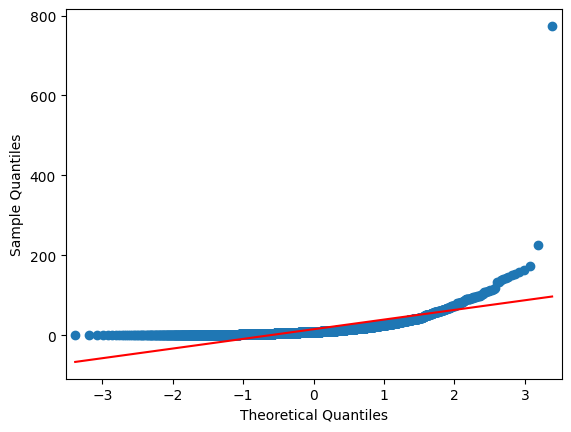

In [23]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df1['Actual_river_slope'], line='s')
pyplot.show()